## Getting the data

In [1]:
#Install gdown
!pip install gdown --quiet

In [2]:
import gdown
url_zip = 'https://drive.google.com/uc?id=1toh7GhPI8aSobYyGmyzaP0jB2TFp11St'
output_zip = '../../data/mixed_dataset.zip'
gdown.download(url_zip, output_zip, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1toh7GhPI8aSobYyGmyzaP0jB2TFp11St
To: /home/luiz/projects/emotion_detect/data/mixed_dataset.zip
542MB [00:22, 23.7MB/s] 


'../../data/mixed_dataset.zip'

In [3]:
from zipfile import ZipFile
file_name = '../../data/mixed_dataset.zip'

with ZipFile(file_name, 'r') as zip:
    zip.extractall(path='../../data/')
    print('Done')

Done


In [4]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2
from tensorflow.keras import regularizers

In [5]:
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_img_datagen.flow_from_directory('../../data/train',
                                                 target_size=(48,48),
                                                 batch_size=64,
                                                 class_mode='categorical')

val_set = val_img_datagen.flow_from_directory('../../data/test',
                                                 target_size=(48,48),
                                                 batch_size=64,
                                                 class_mode='categorical')

Found 96569 images belonging to 7 classes.
Found 24141 images belonging to 7 classes.


In [6]:
#Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001),input_shape=(48,48,3)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(7, kernel_size=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(7, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())

model.add(Dense(7,activation='softmax'))

In [7]:
#num_classes = 7
#
#model = Sequential()
#
##1st convolution layer
#model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,3)))
#model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
#model.add(BatchNormalization())
#
##2nd convolution layer
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
#model.add(BatchNormalization())
#
##3rd convolution layer
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
#model.add(BatchNormalization())
#
#model.add(GlobalAveragePooling2D())
#
##fully connected neural networks
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
#
#model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 108, 108, 128)     5

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, decay=1e-6, momentum=0.9), metrics=['accuracy'])

In [10]:
try: 
    os.mkdir('checkpoint')
except:
    pass

In [11]:
file_name = 'bestmodel_dl.h5'
checkpoint_path = os.path.join('checkpoint',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [12]:
#model_info = model.fit(train_set, steps_per_epoch=449, epochs=10, validation_data=val_set,validation_steps=112,callbacks=call_back)
model_info = model.fit(train_set,epochs=30, validation_data=val_set,callbacks=call_back)

Epoch 1/30


ResourceExhaustedError:  OOM when allocating tensor with shape[64,128,108,108] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node gradient_tape/sequential/max_pooling2d_1/MaxPool/MaxPoolGrad (defined at <ipython-input-12-3d7e62631fd1>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_1963]

Function call stack:
train_function


In [14]:
#Saving the model
model.save('model_dl.h5')

In [15]:
# plots accuracy and loss curves
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

<ipython-input-15-f957539d046f>:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-15-f957539d046f>:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


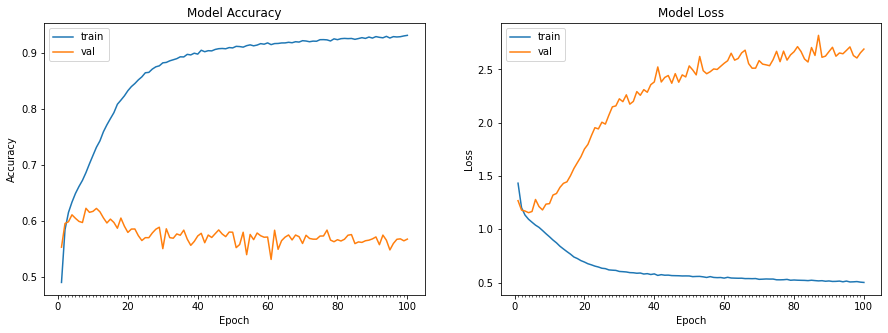

In [16]:
plot_model_history(model_info)

In [18]:
import requests
url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
r = requests.get(url, allow_redirects=True)
open('haarcascade_frontalface_default.xml', 'wb').write(r.content)

930127

In [19]:
url_photo = 'https://drive.google.com/uc?id=1DJbwLlPei5CDA-ooFsFot7dkvRv7oCzO'
output_photo = 'photo.jpg'
gdown.download(url_photo, output_photo, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1DJbwLlPei5CDA-ooFsFot7dkvRv7oCzO
To: /home/luiz/projects/emotion_detect/deploy/notebooks/photo.jpg
100%|██████████| 53.9k/53.9k [00:00<00:00, 854kB/s]


'photo.jpg'

In [31]:
from tensorflow.keras.models import load_model
model = load_model('model_bigger.h5')

In [32]:
validation_generator = val_img_datagen.flow_from_directory(
        '../../data/test',
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 24141 images belonging to 7 classes.
{0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'neutral', 5: 'sadness', 6: 'surprise'}


In [45]:
def emotion_predict(emotions):
    objects=('anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness','surprise')
    y_pos = np.arange(len(objects))
#    print(emotions)
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

In [34]:
def facecrop(image):
    facedata='haarcascade_frontalface_default.xml'
    cascade=cv2.CascadeClassifier(facedata)
    
    img = cv2.imread(image)
    
    try:
        
        minisize=(img.shape[1],img.shape[0])
        miniframe=cv2.resize(img,minisize)
        
        faces=cascade.detectMultiScale(miniframe)
        
        for f in faces:
            x,y,w,h = [v for v in f]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            
            sub_face = img[y:y+h, x:x+w]
            
            cv2.imwrite('capture.jpg', sub_face)
#            print ('Writing: ' + image)
    
    except Exception as e:
        print (e)

In [35]:
facecrop('photo.jpg')

Writing: photo.jpg


Writing: photo.jpg
[2.33502340e-16 8.29304889e-11 1.65029590e-21 9.30688500e-01
 6.93114251e-02 1.07613204e-07 5.19541875e-12]


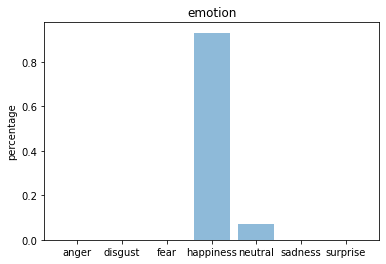

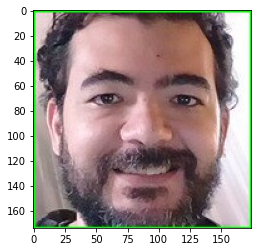

In [46]:
if __name__ == '__main__':
    facecrop('photo.jpg')

#Testing

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

file = 'capture.jpg'
true_image = image.load_img(file)
img = image.load_img(file, target_size=(48,48,3))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x /= 255

custom = model.predict(x)
emotion_predict(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48,48,3])
plt.imshow(true_image)
plt.show()

In [41]:
x.shape

(48, 48, 3)

[0 1 2 3 4 5 6]


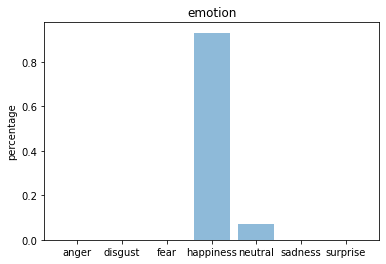

In [44]:
emotion_predict(custom[0])